In [22]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, AdaBoostClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, roc_curve, classification_report, confusion_matrix
from sklearn.svm import SVC 
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from scipy.io import arff

In [2]:
# Step 1: Load the Dataset
data = arff.loadarff('php0iVrYT.arff')  
df = pd.DataFrame(data[0])

In [3]:
# Convert byte strings to regular strings 
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].str.decode('utf-8')

In [4]:
# Rename columns for easier reference
df.columns = ['Recency', 'Frequency', 'Monetary', 'Time', 'Class']

In [5]:
# Ensure numeric types for relevant columns
df[['Recency', 'Frequency', 'Monetary', 'Time']] = df[['Recency', 'Frequency', 'Monetary', 'Time']].apply(pd.to_numeric)

In [6]:
# Display the first few rows of the dataset
print(df.head())

   Recency  Frequency  Monetary  Time Class
0      2.0       50.0   12500.0  98.0     2
1      0.0       13.0    3250.0  28.0     2
2      1.0       16.0    4000.0  35.0     2
3      2.0       20.0    5000.0  45.0     2
4      1.0       24.0    6000.0  77.0     1


In [13]:
#Dataset Size and Description
print("\nDataset Size and Description:")
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")
print("\nDataset Summary:")
print(df.describe())



Dataset Size and Description:
Number of rows: 748
Number of columns: 5

Dataset Summary:
          Recency   Frequency      Monetary        Time
count  748.000000  748.000000    748.000000  748.000000
mean     9.506684    5.514706   1378.676471   34.282086
std      8.095396    5.839307   1459.826781   24.376714
min      0.000000    1.000000    250.000000    2.000000
25%      2.750000    2.000000    500.000000   16.000000
50%      7.000000    4.000000   1000.000000   28.000000
75%     14.000000    7.000000   1750.000000   50.000000
max     74.000000   50.000000  12500.000000   98.000000


In [15]:
#Generate a Correlation Matrix
print("\nCorrelation Matrix:")
correlation_matrix = df.corr()
print(correlation_matrix)


Correlation Matrix:
            Recency  Frequency  Monetary      Time     Class
Recency    1.000000  -0.182745 -0.182745  0.160618 -0.279869
Frequency -0.182745   1.000000  1.000000  0.634940  0.218633
Monetary  -0.182745   1.000000  1.000000  0.634940  0.218633
Time       0.160618   0.634940  0.634940  1.000000 -0.035854
Class     -0.279869   0.218633  0.218633 -0.035854  1.000000


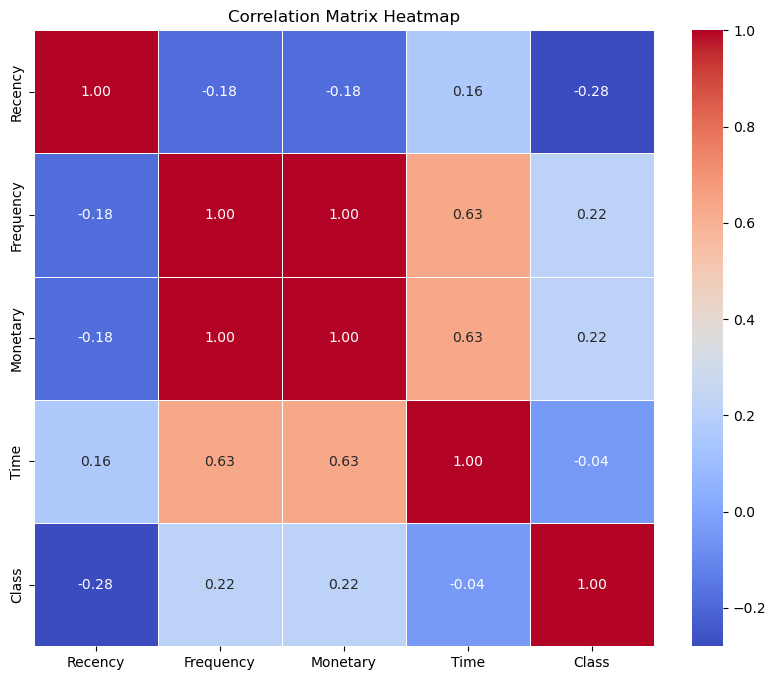

In [17]:
#Plot the Correlation Matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

C:\Users\USER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\USER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\USER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\USER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows wi

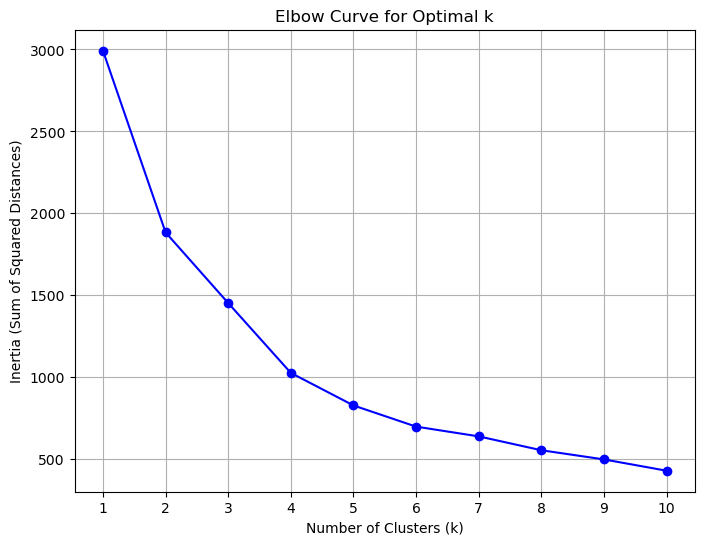

Cluster Centroids (Mean of Numeric Columns):
           Recency  Frequency     Monetary       Time
Cluster                                              
0         7.964602  10.123894  2530.973451  59.676991
1        10.270955   2.888889   722.222222  22.083821
2         4.666667  39.444444  9861.111111  91.888889


C:\Users\USER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


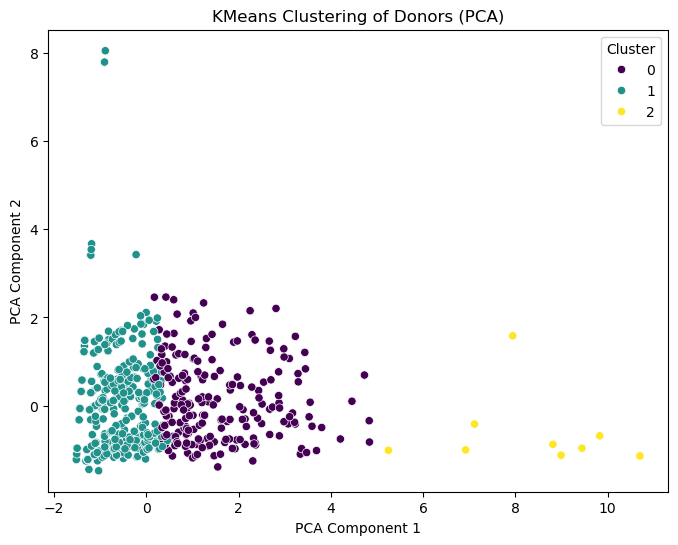

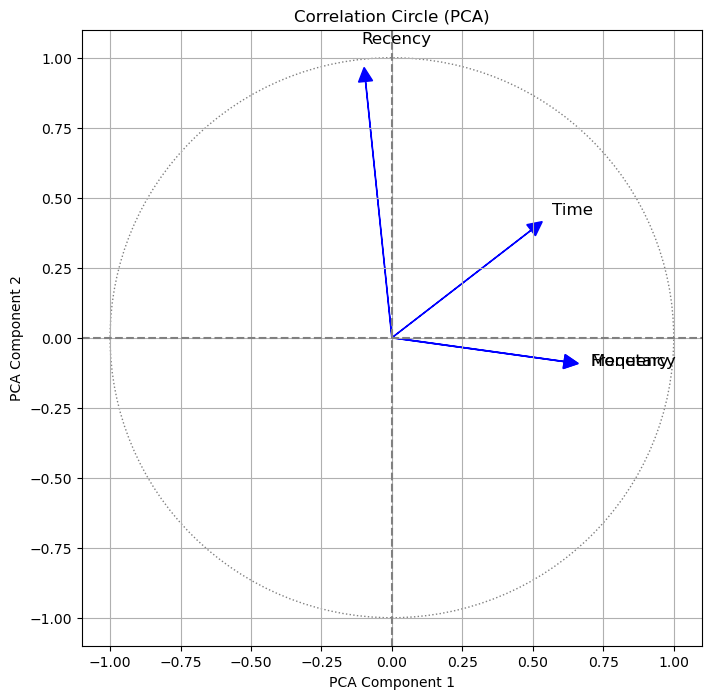

In [19]:
# ----------------- TASK 1: UNSUPERVISED LEARNING (Clustering / Dimension Reduction) -------------------

# Standardize the data
scaler = StandardScaler()
X = df.drop('Class', axis=1)  # Exclude the 'Class' column
X_scaled = scaler.fit_transform(X)

# Determine the optimal number of clusters using the Elbow Curve
inertia = []
k_values = range(1, 11)  # Try k values from 1 to 10
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(8, 6))
plt.plot(k_values, inertia, marker='o', linestyle='-', color='b')
plt.title('Elbow Curve for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Sum of Squared Distances)')
plt.xticks(k_values)
plt.grid()
plt.show()

# Choose k=3 based on the Elbow Curve and apply KMeans Clustering
kmeans = KMeans(n_clusters=3, random_state=42)  # Set k=3 based on the Elbow Curve
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Only computing  the mean for numeric columns
numeric_columns = ['Recency', 'Frequency', 'Monetary', 'Time']  # Only numeric columns
cluster_summary = df.groupby('Cluster')[numeric_columns].mean()

# Print the cluster summary
print("Cluster Centroids (Mean of Numeric Columns):")
print(cluster_summary)

# Visualize Clusters using PCA (Dimension Reduction)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df['Cluster'], palette='viridis')
plt.title('KMeans Clustering of Donors (PCA)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

# Graphical Representation of the Correlation Circle

# Get the PCA components
components = pca.components_

# Feature names
features = X.columns

plt.figure(figsize=(8, 8))
for i, feature in enumerate(features):
    plt.arrow(0, 0, components[0, i], components[1, i], 
              head_width=0.05, head_length=0.05, color='b')
    plt.text(components[0, i] * 1.15, components[1, i] * 1.15, feature, fontsize=12)

# Draw a unit circle
circle = plt.Circle((0, 0), 1, color='gray', fill=False, linestyle='dotted')
plt.gca().add_patch(circle)

plt.axhline(0, color='gray', linestyle='--')
plt.axvline(0, color='gray', linestyle='--')
plt.xlim(-1.1, 1.1)
plt.ylim(-1.1, 1.1)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("Correlation Circle (PCA)")
plt.grid()
plt.show()

In [24]:
# ----------------- TASK 2: REGRESSION (Predict Frequency of Donation) -------------------

# Define the target variable (Frequency) and features
X = df[['Recency', 'Time']]  # Dropping 'Monetary' as it is redundant with 'Frequency' given the correlation matrix heatmap
y = df['Frequency']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree Regression': DecisionTreeRegressor(),
    'Random Forest Regression': RandomForestRegressor(),
    'KNN Regression': KNeighborsRegressor(),
    'AdaBoost Regression': AdaBoostRegressor()
}

# Store metrics in a list
metrics = []

# Evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)  # Train the model
    y_pred = model.predict(X_test)  # Make predictions
    
    # Calculate metrics
    r2 = r2_score(y_test, y_pred)  # R^2 score
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))  # RMSE
    rmae = np.sqrt(np.mean(np.abs(y_test - y_pred)))  # RMAE
    
    # Append the results to the metrics list
    metrics.append([name, r2, rmse, rmae])

# Create a DataFrame to display the metrics as a table
metrics_df = pd.DataFrame(metrics, columns=['Model', 'R^2 Score', 'Root Mean Squared Error (RMSE)', 'Root Mean Absolute Error (RMAE)'])

# Display the table
print(metrics_df)

                      Model  R^2 Score  Root Mean Squared Error (RMSE)  \
0         Linear Regression   0.426545                        3.512624   
1  Decision Tree Regression   0.311310                        3.849407   
2  Random Forest Regression   0.507630                        3.254828   
3            KNN Regression   0.416954                        3.541876   
4       AdaBoost Regression   0.395102                        3.607638   

   Root Mean Absolute Error (RMAE)  
0                         1.500209  
1                         1.513367  
2                         1.427053  
3                         1.477235  
4                         1.611441  


                  Model  Accuracy  F1 Score  Precision    Recall   AUC-ROC
0   Logistic Regression  0.657778  0.549708   0.423423  0.783333  0.761061
1  Logistic Regression1  0.737778  0.144928   0.555556  0.083333  0.757929
2         Decision Tree  0.666667  0.311927   0.346939  0.283333  0.564747
3         Random Forest  0.733333  0.347826   0.500000  0.266667  0.677525
4                   KNN  0.702222  0.336634   0.414634  0.283333  0.666010
5                   SVC  0.737778  0.032787   1.000000  0.016667  0.626515
6                   QDA  0.488889  0.449761   0.315436  0.783333  0.600808
7              AdaBoost  0.760000  0.341463   0.636364  0.233333  0.735505


C:\Users\USER\anaconda3\Lib\site-packages\sklearn\discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\USER\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


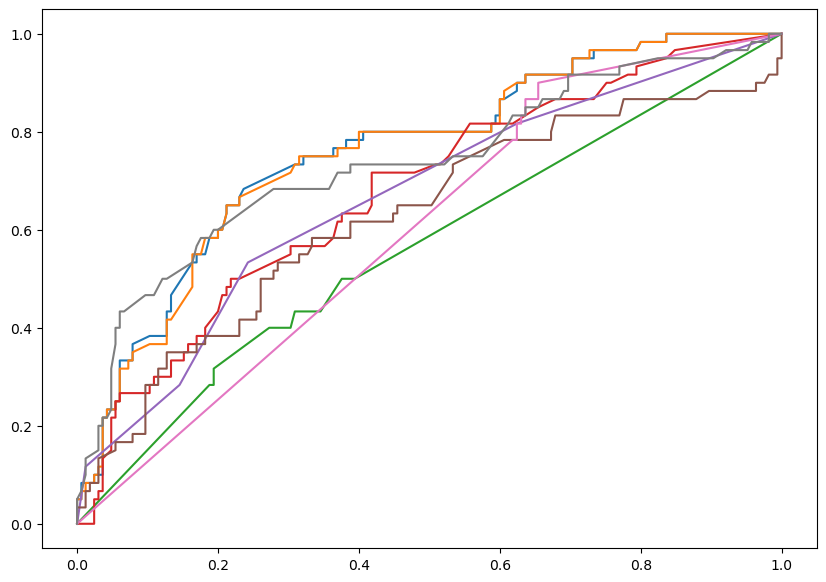

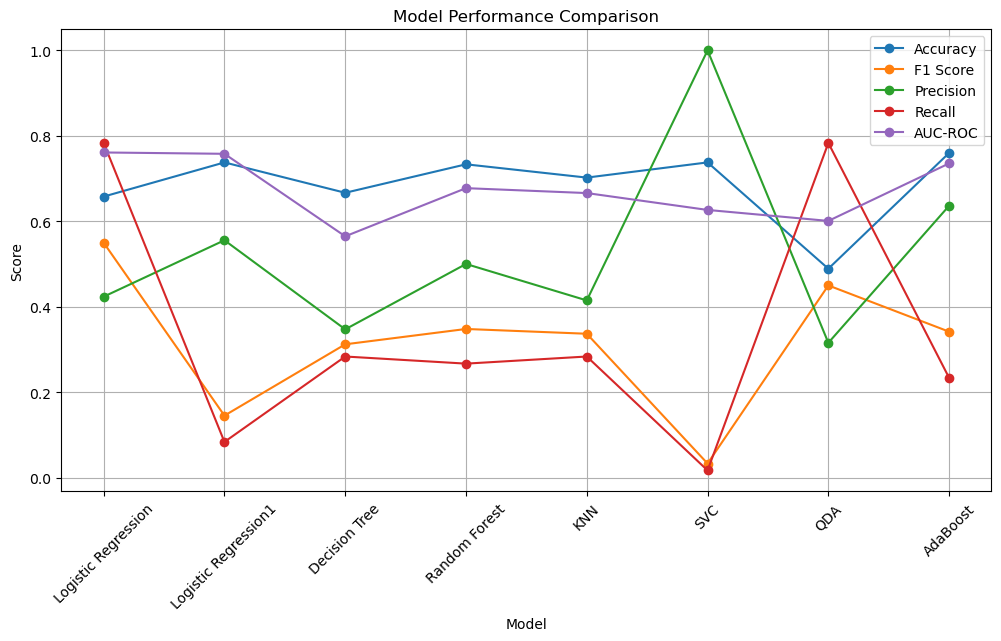

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


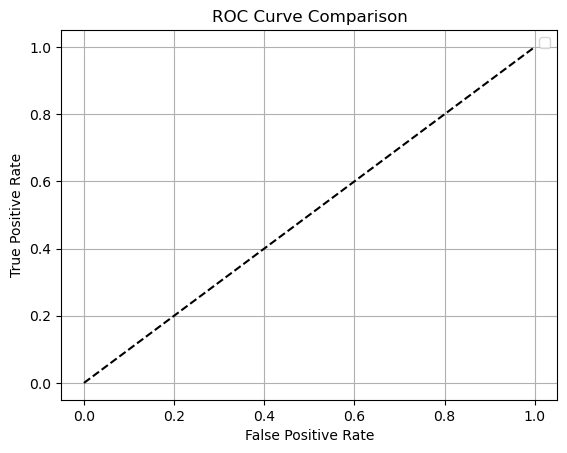

In [26]:
# ----------------- TASK 3: CLASSIFICATION (Predict if a Donor Will Donate) -------------------

# Define the target variable (Class) and features
X = df[['Recency', 'Frequency', 'Monetary', 'Time']]
y = df['Class'].astype(int) - 1  # Convert {1,2} to {0,1}

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# List of models to try
models = {
    "Logistic Regression": LogisticRegression(class_weight='balanced'),
    "Logistic Regression1": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5),  
    "SVC": SVC(probability=True),  
    "QDA": QuadraticDiscriminantAnalysis(), 
    "AdaBoost": AdaBoostClassifier(random_state=42)

}

# Dictionary to store results
results = []


#ROC curve plot
plt.figure(figsize=(10, 7))


# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Some models support probability predictions
    y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None
    
    # Compute evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    auc_roc = roc_auc_score(y_test, y_prob) if y_prob is not None else None  


    results.append({
        "Model": name,
        "Accuracy": accuracy,
        "F1 Score": f1,
        "Precision": precision,
        "Recall": recall,
        "AUC-ROC": auc_roc
    })

    # Plot ROC curve if probability is available
    if y_prob is not None:
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        plt.plot(fpr, tpr, label=f"{name} (AUC = {auc_roc:.2f})")
    
# Convert results to a DataFrame and display
results_df = pd.DataFrame(results)
print(results_df)

# ----------------- PERFORMANCE VISUALIZATION -------------------

# Plot performance metrics
plt.figure(figsize=(12, 6))
metrics = ["Accuracy", "F1 Score", "Precision", "Recall", "AUC-ROC"]
for metric in metrics:
    plt.plot(results_df["Model"], results_df[metric], marker="o", label=metric)

plt.xlabel("Model")
plt.ylabel("Score")
plt.title("Model Performance Comparison")
plt.legend()
plt.xticks(rotation=45)
plt.grid()
plt.show()

# ----------------- ROC CURVE PLOT -------------------
plt.plot([0, 1], [0, 1], "k--")  # Diagonal reference line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.grid()
plt.show()

In [28]:
'''Logistic regression (balanced) is the best model to use since it has the highes F1 score as wdell as the AUC-ROC'''

'Logistic regression (balanced) is the best model to use since it has the highes F1 score as wdell as the AUC-ROC'

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.61      0.72       165
           1       0.42      0.78      0.55        60

    accuracy                           0.66       225
   macro avg       0.65      0.70      0.64       225
weighted avg       0.76      0.66      0.68       225

Confusion Matrix for Logistic Regression:


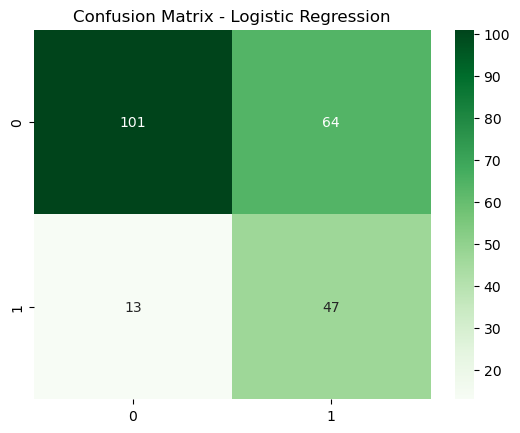

In [30]:
# Classification Report and Confusion Matrix
model = LogisticRegression(class_weight='balanced')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('Logistic Regression Classification Report:')
print(classification_report(y_test, y_pred))

print('Confusion Matrix for Logistic Regression:')
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Greens', fmt='d')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_31084\1815821277.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances, y=features, palette="magma")


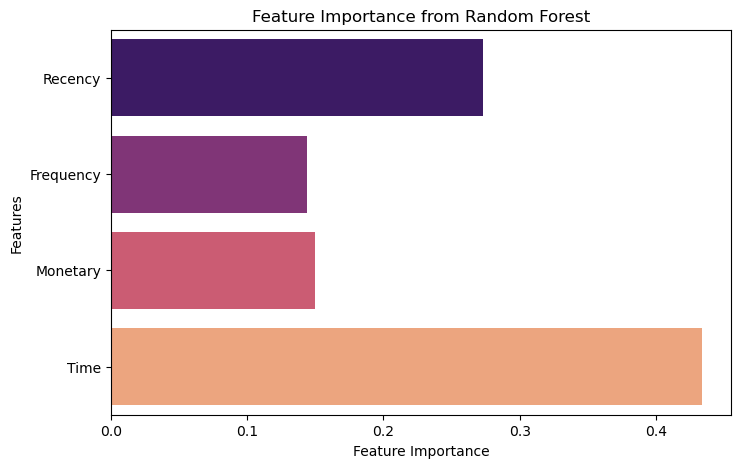

In [32]:
rf_model = models["Random Forest"]

# Extract feature importances
importances = rf_model.feature_importances_
features = X.columns

# Plot the feature importance
plt.figure(figsize=(8, 5))
sns.barplot(x=importances, y=features, palette="magma")
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance from Random Forest")
plt.show()